# Topic Modelling Using Latent Dirichelt Allocation

The dataset that has been used here is downloaded from Kaggle and contains reviews of a certain cellphone model and the sentiment attatched to the model. Since topic modelling is the main aim here, the sentiment column will not be necessary and can be dropped.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
review = pd.read_csv('Reviews.csv')

In [3]:
review.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [4]:
#Dropping the sentiment column
review.drop('sentiment',axis=1,inplace=True)
review.head()

,review
0,Good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr..."
2,when I will get my 10% cash back.... its alrea...
3,Good
4,The worst phone everThey have changed the last...


In [5]:
len(review)

14675

# Text Preprocessing

Here, CountVectorizer is used to remove the stopwords and convert all the documents(reviews) into a dictionary of features which is later transformed to feature vectors.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

**max_df** is used to ignore the words that have a document frequency that is greater than the threshold given. It is done so that we do not take in repeated words which may end up appearing in multiple topics.

**min_df** is used to ignore terms that have a document frequency that is lesser than the given threshold. We cannot really find any topic for a word if it appears just once and thus the threshold is set at 2 and words that appears more than 2 times are considered.

In [8]:
dtm = cv.fit_transform(review['review'])

In [9]:
dtm

<14675x4827 sparse matrix of type '<class 'numpy.int64'>'
	with 139135 stored elements in Compressed Sparse Row format>

Here we can see that the documents have been converted into a sparse matrix. The number 4827 represents the total number of words that are present.

# Implementing the Latent Dirichelt Allocation

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

In [11]:
t_model = LatentDirichletAllocation(n_components=12, random_state=42)

It is difficult to exactly guess how many topics would be right for a dataset unless we have some domain knowledge with respect to that field.

In [12]:
t_model.fit(dtm)

LatentDirichletAllocation(n_components=12, random_state=42)

#### Checking top words for just a single topic

In [13]:
#Grabbing all the words that appear in the first topic
single_topic = t_model.components_[0]

In [14]:
single_topic

array([0.08333333, 1.82787704, 0.08333333, ..., 0.08333333, 0.08333405,
       0.08333639])

In [15]:
single_topic.argsort()

array([4589, 2117, 2862, ..., 4772,  801, 3238], dtype=int64)

In [16]:
#By using Numpy's argsort we can find out all the top words in a topic and grabbing the top 10 of them
single_topic.argsort()[-10:]

array([1597,  529, 4685, 2848, 3429, 2870, 1428, 4772,  801, 3238],
      dtype=int64)

### Checking the top words in all the topics

In [17]:
#Creating a loop to give the top 15 words from each topic
for index, topic in enumerate(t_model.components_):
    print(f"THE TOP 15 WORDS IN TOPIC #{index}:")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS IN TOPIC #0:
['quality', 'glass', 'camera', 'super', 'worth', 'excellent', 'awesome', 'waste', 'mobile', 'product', 'money', 'don', 'worst', 'buy', 'phone']


THE TOP 15 WORDS IN TOPIC #1:
['life', 'bad', 'charging', 'performance', 'ok', 'camera', 'issue', 'poor', 'fast', 'phone', 'backup', 'problem', 'good', 'heating', 'battery']


THE TOP 15 WORDS IN TOPIC #2:
['working', 'hours', 'time', 'fast', 'great', 'takes', 'slow', 'charge', 'product', 'mobile', 'turbo', 'charger', 'charging', 'phone', 'nice']


THE TOP 15 WORDS IN TOPIC #3:
['core', 'processor', 'ram', 'dolby', '10', 'like', 'use', 'sim', 'card', 'battery', 'music', 'app', 'dual', 'phone', 'camera']


THE TOP 15 WORDS IN TOPIC #4:
['amazing', 'battery', 'bad', 'features', 'range', 'awesome', 'performance', 'quality', 'product', 'price', 'mobile', 'best', 'camera', 'phone', 'good']


THE TOP 15 WORDS IN TOPIC #5:
['center', 'worst', 'issue', 'customer', 'days', 'don', 'lenovo', 'want', 'problem', 'buy', 'retur

# Adding the topics to the dataframe

In [18]:
topic_results = t_model.transform(dtm)

In [19]:
topic_results[0].round(2).argmax()

10

In [20]:
review['Topic'] = topic_results.argmax(axis=1)
review.head()

,review,Topic
0,Good but need updates and improvements,10
1,"Worst mobile i have bought ever, Battery is dr...",8
2,when I will get my 10% cash back.... its alrea...,3
3,Good,4
4,The worst phone everThey have changed the last...,5


Like I mentioned earlier, we cannot exactly say which topic a certain sentence belongs to unless we have the required domain experience and what we are looking for. I have just given a random guess as to what these 12 topics might based on the type of words that appear in each topic.

In [21]:
my_topic = {0:'General', 1:'Negative Review', 2:'Battery', 3:'Hardware', 4:'Price', 5:'Customer Service', 6:'Redmi', 7:'Network',
           8:'Usage', 9:'Positive Review', 10:'Other', 11:'Software'}

In [22]:
review['Topic'] = review['Topic'].map(my_topic)

In [23]:
review.head()

,review,Topic
0,Good but need updates and improvements,Other
1,"Worst mobile i have bought ever, Battery is dr...",Usage
2,when I will get my 10% cash back.... its alrea...,Hardware
3,Good,Price
4,The worst phone everThey have changed the last...,Customer Service


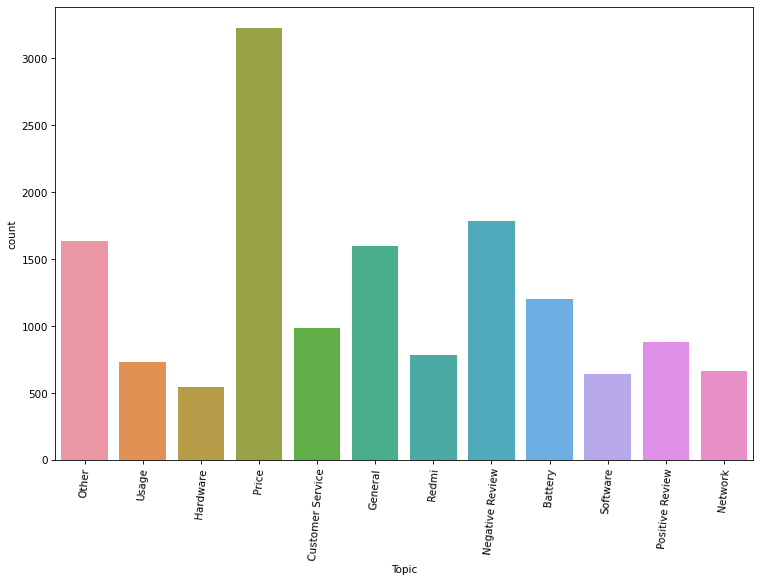

In [24]:
#A plot to check which topic appears most in the reviews
plt.figure(figsize=(12,8), dpi=75)
sns.countplot(review['Topic'], data=review)
plt.xticks(rotation=85);

**From the plot, we can see most reviews are based on Price followed by Negative reviews and General reviews. By looking at this, one thing the phone manufacturer and the seller can do is that they can look into what the reason is for the negative reviews and address those issues by making necessary improvements as there are negative reviews for both the product and the customer service of the seller.**